# Sales Performance of Video Games

In [123]:
# Importing all required libraries.

import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,ZeroPadding2D
from tensorflow.keras.optimizers import SGD,Adam
from keras.optimizers import RMSprop
from sklearn.metrics import classification_report
from keras import callbacks
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [2]:
# Importing csv data into a dataframe.

video_df = pd.read_csv("./Video_Games.csv")

In [3]:
# Viewing the dataframe.

video_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Retrieving information about the dataframe.

video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
video_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [6]:
video_df.duplicated().sum()

0

In [7]:
video_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

## Data Cleaning

In [8]:
"""

The Name and Genre are columns in which values cannot be derived from another feature or target.
Also, the total number of the missing data samples from the aforementioned dataseries is 4, which is significantly....
small compared to the total number data records.
Hence, these missing data samples would be dropped from the dataframe using the dropna() method and the subset........
parameter to remove record from multiple dataseries.

"""

video_df = video_df.dropna(subset = ["Name"])
video_df = video_df.dropna(subset = ["Genre"])

In [9]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16663 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.2+ MB


In [10]:
"""

Critic Score and User Score are important to determine the Rating a game. 
Using the Pandas interpolate() method to estimated unknown values within a range of the known values for Year_of_Release,.. 
........Critic Score, Critic Count, User Score, User Count and Developer.

"""

video_df["Year_of_Release"].interpolate(inplace = True)

video_df["Critic_Score"].interpolate(inplace = True)

video_df["Critic_Count"].interpolate(inplace = True)

# Converting the dataseries into a numeric datatype (float) as it contains some string values.
video_df["User_Score"] = pd.to_numeric(video_df["User_Score"], errors= "coerce") 
video_df["User_Score"].interpolate(inplace = True)

video_df["User_Count"].interpolate(inplace = True)

video_df["Developer"].interpolate(inplace = True)


In [11]:
"""

The Year_of_Release, Critic_Count and User_Count are of datatype of float.
Converting from float to int as Year and count are whole number and not fraction.

"""

video_df[["Year_of_Release","Critic_Count","User_Count"]] = video_df[["Year_of_Release",
                                                                      "Critic_Count","User_Count"]].astype("int64")

In [12]:
"""

All missing values (NaN) for dataseries Rating was replace with the value "Unknown".
This is so, as Rating of a video game is dependent on Critic_Score & User_Score and the accurate derivation is unknown.

"""

video_df["Rating"].fillna("Unknown", inplace = True)

In [13]:
"""
To fill the "NaN" value in the Developer dataseries, the mode (Publisher) for each Genre of video game was computed and...
.... used to fill the NaN values.


"""
for x in video_df["Genre"].unique():
    genre_df = video_df[video_df["Genre"] == x]
    modes = genre_df["Publisher"].mode()
    for i in modes:
        for index, row in video_df.iterrows():
            if row["Genre"] == x and pd.isna(row["Publisher"]):
                video_df.loc[index, "Publisher"] = i       


In [14]:
"""
To fill the "NaN" value in the Developer dataseries, the mode (Developer) for each Genre of video game was computed and...
.... used to fill the NaN values.


"""
for x in video_df["Genre"].unique():
    genre_df = video_df[video_df["Genre"] == x]
    modes = genre_df["Developer"].mode()
    for i in modes:
        for index, row in video_df.iterrows():
            if row["Genre"] == x and pd.isna(row["Developer"]):
                video_df.loc[index, "Developer"] = i       


In [15]:
# Verifying if there is any missing value in the dataframe.

video_df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [16]:
# Retrieving information (count) of each platforms.
video_df["Platform"].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

**For Better analyis, some platforms would be grouped.**

In [17]:
# Setting the a bar of 800 for the grouping.
platform_grp = 800

# Assign a variable for the count of each platform.
platform_count = video_df["Platform"].value_counts()

In [18]:
# Filtering top performaing platforms as those with at least 800 occurrence
platform_top = platform_count[platform_count.values >= platform_grp].index.tolist()

In [19]:
list_platform = []

for sales_data in range(video_df.shape[0]):  # loop through all rows in dataframe
    platform_names = video_df.Platform.values[sales_data]  # retreiving the values in platform column
    categorize = 0  # categorize variable
    for value in platform_top:  # loop through the list of platform considered
        if value in platform_names and categorize == 0:  # checking if platform name is in the row
            list_platform.append(value)
            categorize = 1
    if categorize == 0:  # checking if the current platform is different from the list of platforms considered
        list_platform.append("Other Platforms")

In [20]:
video_df["All_platforms"] = list_platform

In [21]:
# Verifying the counts. 
video_df["All_platforms"].value_counts()

DS                 2672
PS2                2161
PS                 2022
Other Platforms    1972
Wii                1467
PS3                1331
X360               1262
PSP                1209
PC                  975
XB                  824
GBA                 822
Name: All_platforms, dtype: int64

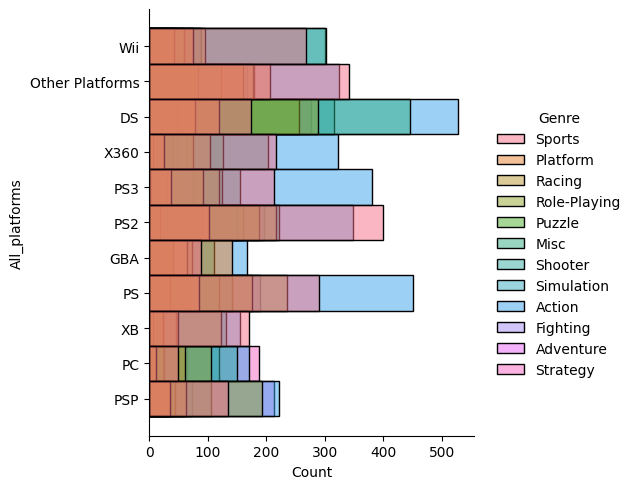

In [22]:
 sns.displot(data =video_df, y = "All_platforms", hue = "Genre");

### Categorial Variables Plot

In [23]:
# Printing of the basic data statistics of all variables.
video_df_cv = video_df.select_dtypes(include = "object") 
video_df_cv.describe().transpose()

,count,unique,top,freq
Name,16717,11562,Need for Speed: Most Wanted,12
Platform,16717,31,PS2,2161
Genre,16717,12,Action,3370
Publisher,16717,581,Electronic Arts,1360
Developer,16717,1696,Omega Force,1224
Rating,16717,9,Unknown,6767
All_platforms,16717,11,DS,2672


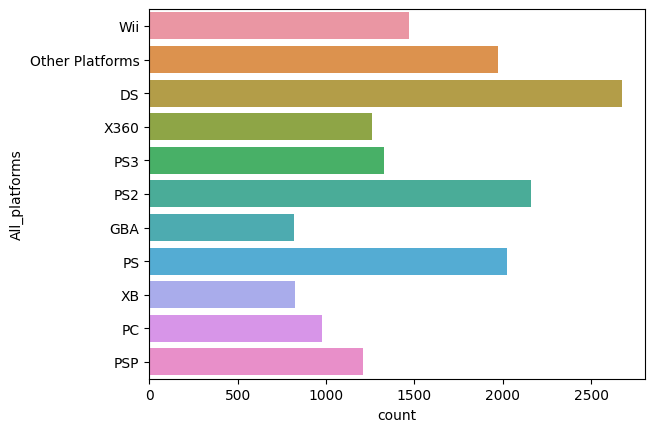

In [24]:
sns.countplot(data=video_df_cv, y = 'All_platforms');

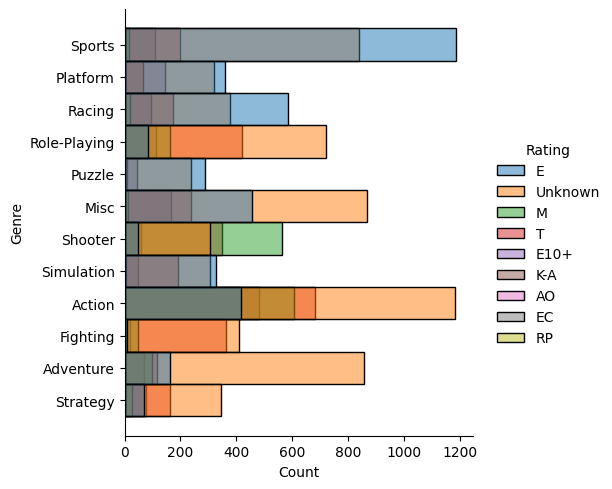

In [25]:
sns.displot(data =video_df_cv, y = 'Genre', hue = 'Rating')

### Bivariate Analysis

In [26]:
video_df_num = video_df.select_dtypes(exclude = "object")

Text(0.5, 1.0, 'Heatmap showing correlation')

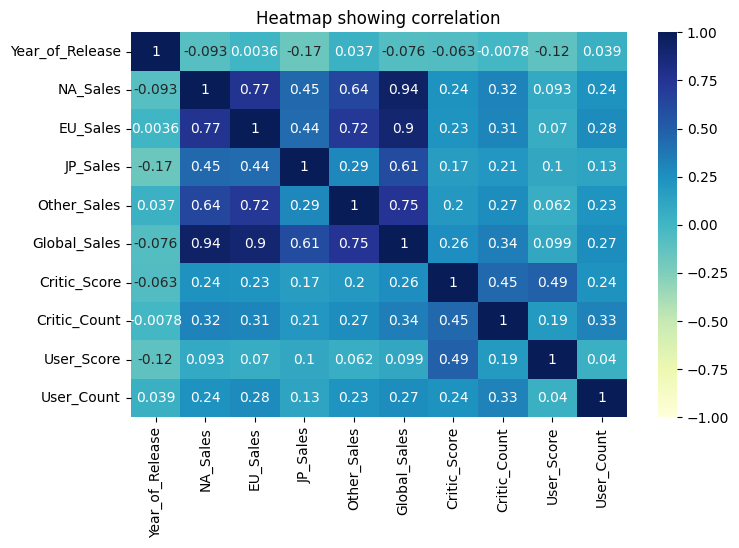

In [27]:
video_df_corr = video_df_num.corr() # checking for correlation 
plt.figure(figsize = (8,5)) #set figure size
sns.heatmap(video_df_corr, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu")
#Values close to -1 has high negative correlation
#Values close to 1 has high positive correlation
plt.title("Heatmap showing correlation")


In [28]:
"""
Using the Regression to analyse relationships between the independent variables and the target.
The coefficient would inform us about the magnitude and direction of the relationship between feature and a target variable.
"""

model = LinearRegression().fit(video_df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score",
                                         "Critic_Count", "User_Score", "User_Count"]], video_df["Global_Sales"])

coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)


Coefficients: [ 9.99911824e-01  1.00001112e+00  9.99980533e-01  9.99611085e-01
  4.39525382e-07 -6.84975753e-06 -1.28829985e-05 -5.17082226e-08]
Intercept: 0.0005305459722555472


In [29]:
"""
Using Feature Importance to determine relationships between the independent variables and the target.
This wpuld provide information on how much each feature contributes to the prediction of the target variable.
"""

model = DecisionTreeRegressor().fit(video_df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Score",
                                         "Critic_Count", "User_Score", "User_Count"]], video_df["Global_Sales"])


feature_importance = model.feature_importances_

print('Feature importances:', feature_importance)


Feature importances: [7.86790610e-01 1.82670572e-01 2.42290344e-02 3.69062438e-03
 5.70169625e-04 6.55170980e-04 1.11508100e-03 2.78738083e-04]


In [30]:
# Creating a function that creates a scatterplot between two numerical features.

def func_scatterplot(x, y, title, data = video_df_num):   
    plt.figure(figsize = (8,5)) #set figure size
    sns.scatterplot(x = x, y = y, data = video_df)
    plt.title(title)
    plt.show()

### NA_Sales vs Global_Sales

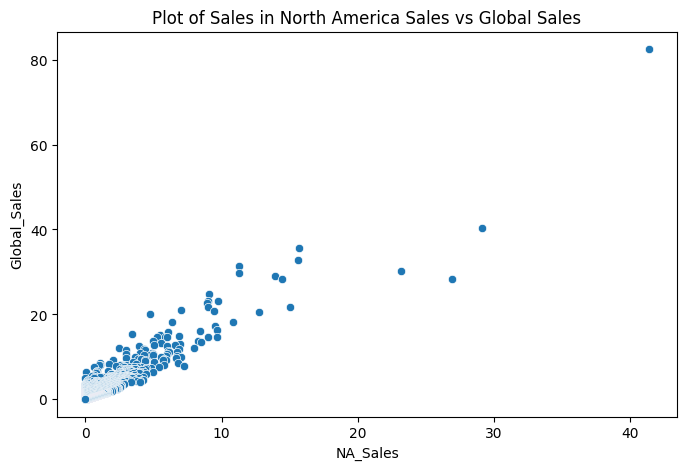

In [31]:
# Calling the scatter plot function.
func_scatterplot(x= "NA_Sales", y = "Global_Sales", 
               title= "Plot of Sales in North America Sales vs Global Sales", data = video_df )

#### Analysis:
- Sales is North America has a positive relationship with Global Sales. From the feature importance, North America Sales would contribute greatly to Global_Sales. Hence, Global sales would decrease if the sales in North America decreases.
- Sales in North America would be a good feature variable to predict global sales.

### EU_Sales vs Global_Sales

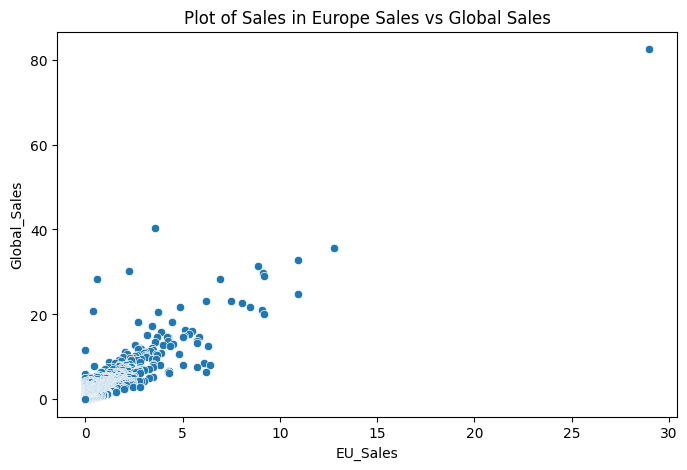

In [32]:
# Calling the scatter plot function.
func_scatterplot(x= "EU_Sales", y = "Global_Sales", 
               title= "Plot of Sales in Europe Sales vs Global Sales", data = video_df )

#### Analysis:
- Just like North America Sales, Europe Sales have a strong correlation with Global Sales. 
- Europe Sales contribution to the prediction of Global Sales would be relatively low compared to that of North America Sales.
- Europe Sales have a strong positive relationship with Global Sales as seen from the Coefficient analysis.

### Japan_Sales vs Global_Sales

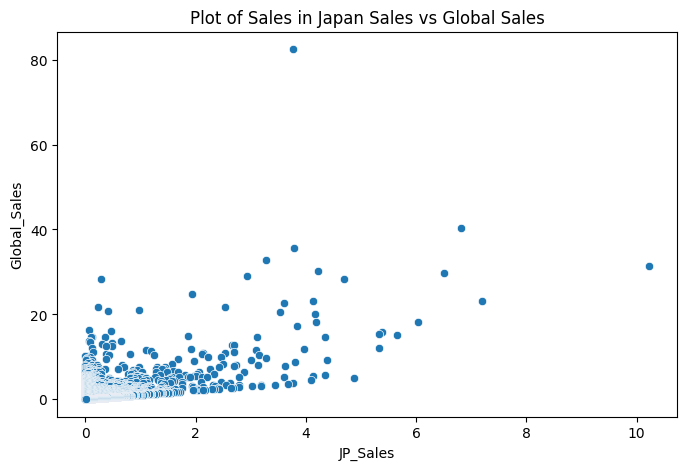

In [33]:
func_scatterplot(x= "JP_Sales", y = "Global_Sales", 
               title= "Plot of Sales in Japan Sales vs Global Sales", data = video_df )

**Analysis:**
- Japan Sales also have a strong positive relationship with Global Sales even though the heatmap is showing an average correlation. 
- However, the contribution of Japan Sales to the prediction of Global Sales would be minimal.
- There is as a result of the correlation that exists between JP_Sales and other variables ( A multicolinearity problem).

### Other_Sales vs Global_Sales

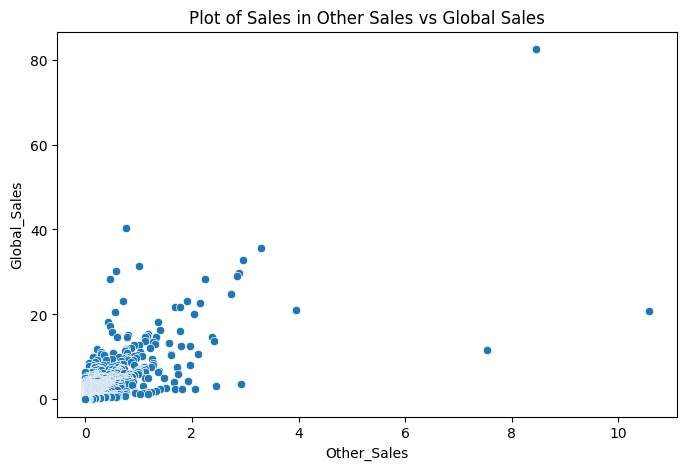

In [34]:
func_scatterplot(x= "Other_Sales", y = "Global_Sales", 
               title= "Plot of Sales in Other Sales vs Global Sales", data = video_df )

**Analysis:**
- Like NA-Sales, EU_Sales and Japan_Sales it has a strong positive relationship with Global Sales.
- It has a strong correlation with Global Sales even better than Japan Sales. 
- Nonetheless, the contribution of Other Sales to the prediction of Global Sales would be low.

### User_Score vs Global_Sales

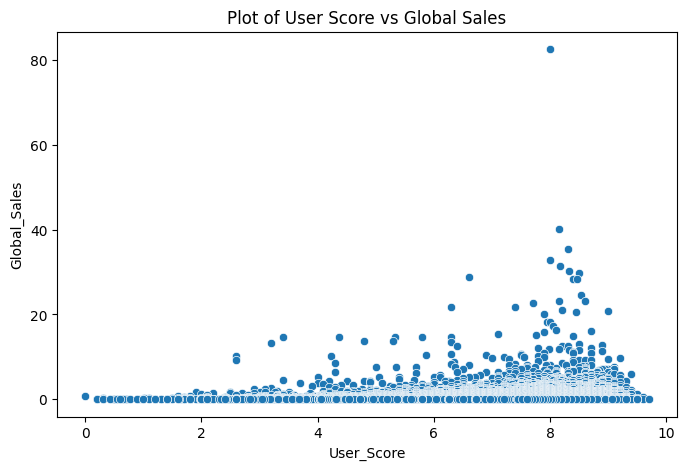

In [35]:
func_scatterplot(x= "User_Score", y = "Global_Sales", 
               title= "Plot of User Score vs Global Sales", data = video_df )

**Analysis:**
- There is no relationship between User Score and Global Sales.

### Critic_Score vs Global_Sales

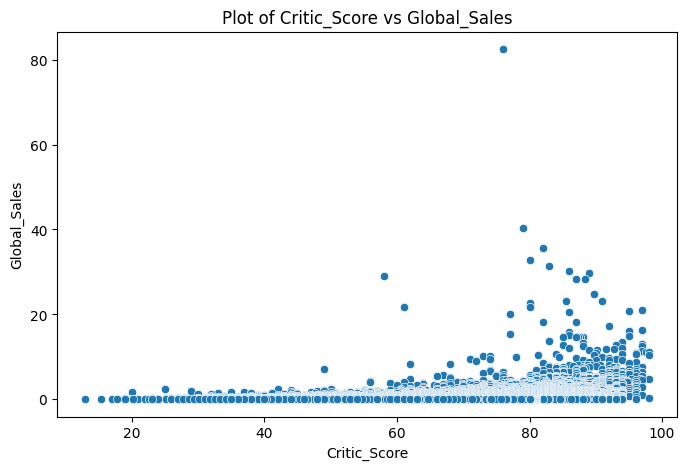

In [36]:
func_scatterplot(x= "Critic_Score", y = "Global_Sales", 
               title= "Plot of Critic_Score vs Global_Sales", data = video_df )

**Analysis:**
- There is no relationship between Critic Score and Global Sales.

### User_Count vs Global_Sales

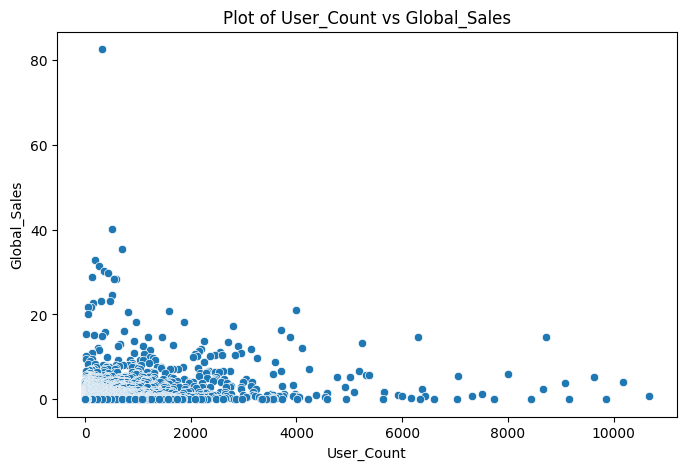

In [37]:
func_scatterplot(x= "User_Count", y = "Global_Sales", 
               title= "Plot of User_Count vs Global_Sales", data = video_df )

**Analysis:**
-  There is a weak negative relationship between User Count and Global Sales.

### Critic_Count vs Global_Sales

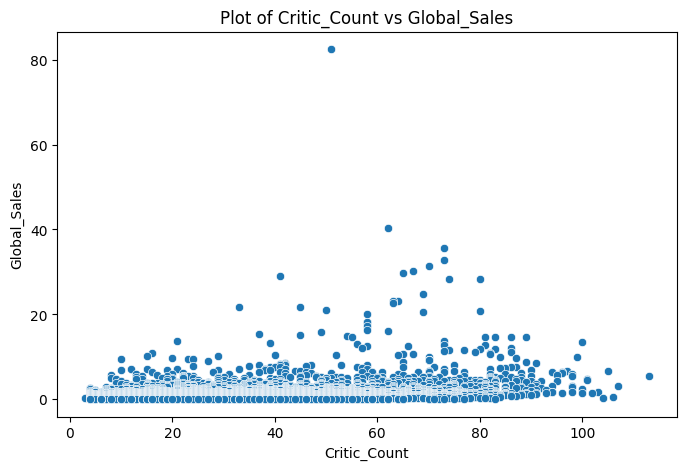

In [38]:
func_scatterplot(x= "Critic_Count", y = "Global_Sales", 
               title= "Plot of Critic_Count vs Global_Sales", data = video_df )

**Analysis:**
- There is a weak negative relationship between Critic Count and Global Sales.
- It has a 0.34 correlation to Global Sales but relatively low feature importance.

### Rating vs Global_Sales

Text(0.5, 1.0, 'Rating vs Global Sales')

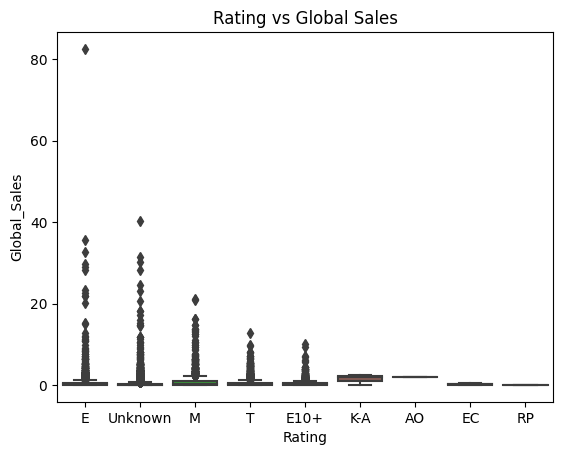

In [39]:
# Using boxplot to show the relationship because 'Rating' is a continuous variable.  
sns.boxplot( x = "Rating", y = "Global_Sales", data = video_df)
plt.title("Rating vs Global Sales")

**Analysis:**
- The video game rated E has more Global Sales.

**Developing the Machine Learning model.**

In [40]:
# Select the features for our model
model_features = video_df[["NA_Sales","JP_Sales","Other_Sales","EU_Sales","Critic_Score", 
                                "Critic_Count", "User_Count", "User_Score"]]

model_target = video_df["Global_Sales"]

In [41]:
# Overview of features 
model_features

,NA_Sales,JP_Sales,Other_Sales,EU_Sales,Critic_Score,Critic_Count,User_Count,User_Score
0,41.36,3.77,8.45,28.96,76.0,51,322,8.000000
1,29.08,6.81,0.77,3.58,79.0,62,515,8.150000
2,15.68,3.79,3.29,12.76,82.0,73,709,8.300000
3,15.61,3.28,2.95,10.93,80.0,73,192,8.000000
4,11.27,10.22,1.00,8.89,83.0,70,271,8.166667
...,...,...,...,...,...,...,...,...
16714,0.00,0.01,0.00,0.00,63.0,6,8,5.800000
16715,0.00,0.00,0.00,0.01,63.0,6,8,5.800000
16716,0.00,0.01,0.00,0.00,63.0,6,8,5.800000
16717,0.01,0.00,0.00,0.00,63.0,6,8,5.800000


In [42]:
scale = StandardScaler() # applying regularization using 
scale.fit(model_features)
model_features_scaled = scale.transform(model_features)

In [43]:
model_features

,NA_Sales,JP_Sales,Other_Sales,EU_Sales,Critic_Score,Critic_Count,User_Count,User_Score
0,41.36,3.77,8.45,28.96,76.0,51,322,8.000000
1,29.08,6.81,0.77,3.58,79.0,62,515,8.150000
2,15.68,3.79,3.29,12.76,82.0,73,709,8.300000
3,15.61,3.28,2.95,10.93,80.0,73,192,8.000000
4,11.27,10.22,1.00,8.89,83.0,70,271,8.166667
...,...,...,...,...,...,...,...,...
16714,0.00,0.01,0.00,0.00,63.0,6,8,5.800000
16715,0.00,0.00,0.00,0.01,63.0,6,8,5.800000
16716,0.00,0.01,0.00,0.00,63.0,6,8,5.800000
16717,0.01,0.00,0.00,0.00,63.0,6,8,5.800000


In [44]:
# Converting the resulting numpy arrays to pandas dataframe.
model_features_scaled = pd.DataFrame(model_features_scaled, columns = model_features.columns)
model_features_scaled

,NA_Sales,JP_Sales,Other_Sales,EU_Sales,Critic_Score,Critic_Count,User_Count,User_Score
0,50.521473,11.956196,45.002649,57.253447,0.639930,1.606546,0.397613,0.692882
1,35.425297,21.799911,3.870431,6.825093,0.877413,2.270937,0.814492,0.803590
2,18.952271,12.020957,17.366940,25.065136,1.114895,2.935328,1.233532,0.914297
3,18.866218,10.369545,15.545982,21.429049,0.956573,2.935328,0.116813,0.692882
4,13.530925,32.841709,5.102255,17.375706,1.194056,2.754130,0.287453,0.815891
...,...,...,...,...,...,...,...,...
16712,-0.323628,-0.218924,-0.253502,-0.288126,-0.389160,-1.111418,-0.280627,-0.930827
16713,-0.323628,-0.251305,-0.253502,-0.268257,-0.389160,-1.111418,-0.280627,-0.930827
16714,-0.323628,-0.218924,-0.253502,-0.288126,-0.389160,-1.111418,-0.280627,-0.930827
16715,-0.311334,-0.251305,-0.253502,-0.288126,-0.389160,-1.111418,-0.280627,-0.930827


In [45]:
# Reshaping all columns to rows and columns.

X_scaled_for_JP = model_features_scaled['JP_Sales'].to_numpy().reshape(-1, 1)
X_scaled_for_NA = model_features_scaled['NA_Sales'].to_numpy().reshape(-1, 1)
X_scaled_for_Other = model_features_scaled['Other_Sales'].to_numpy().reshape(-1, 1)
X_scaled_for_EU = model_features_scaled['EU_Sales'].to_numpy().reshape(-1, 1)

### Simple Linear Regression

In [46]:
# Define the regressor.
Lreg = LinearRegression()
# Define the cross validation strategy of 5 folds.
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
#Performing Cross validation

def model_eval(X_scaled,model_target,X_scaled_name,linear):
    # Calculating the  mean square error
    if (linear):
        X_scaled = model_features_scaled[X_scaled_name].to_numpy().reshape(-1, 1)
    else:
        X_scaled = model_features_scaled[X_scaled_name.split(",")]
    mse_scores= -cross_val_score(Lreg, X_scaled, model_target, scoring='neg_mean_squared_error', cv=cv)
    # Calculating the mean absolute error
    mae_scores= -cross_val_score(Lreg, X_scaled, model_target, scoring='neg_mean_absolute_error', cv=cv)
    # Calculating the Coefficient of determination
    cod_scores = cross_val_score(Lreg, X_scaled, model_target, scoring='r2', cv=cv)
    print(f"Mean Absolute Error score for {X_scaled_name}: {mae_scores.mean():.3f}")
    print(f"Mean Square Error score for {X_scaled_name}: {mse_scores.mean():.3f}")
    print(f"Coefficient of determination {X_scaled_name}: {cod_scores.mean():.3f}")
    print(("-")*50)
    return


In [48]:
model_eval(X_scaled_for_NA, model_target,"NA_Sales",True)
model_eval(X_scaled_for_JP, model_target,"JP_Sales",True)
model_eval(X_scaled_for_Other, model_target,"Other_Sales",True)
model_eval(X_scaled_for_EU, model_target,"EU_Sales",True)

Mean Absolute Error score for NA_Sales: 0.199
Mean Square Error score for NA_Sales: 0.302
Coefficient of determination NA_Sales: 0.865
--------------------------------------------------
Mean Absolute Error score for JP_Sales: 0.500
Mean Square Error score for JP_Sales: 1.509
Coefficient of determination JP_Sales: 0.377
--------------------------------------------------
Mean Absolute Error score for Other_Sales: 0.322
Mean Square Error score for Other_Sales: 1.198
Coefficient of determination Other_Sales: 0.426
--------------------------------------------------
Mean Absolute Error score for EU_Sales: 0.245
Mean Square Error score for EU_Sales: 0.451
Coefficient of determination EU_Sales: 0.795
--------------------------------------------------


### Multiple Regression

In [49]:
model_eval(X_scaled_for_NA, model_target,"Other_Sales,EU_Sales,JP_Sales",False)

Mean Absolute Error score for Other_Sales,EU_Sales,JP_Sales: 0.178
Mean Square Error score for Other_Sales,EU_Sales,JP_Sales: 0.263
Coefficient of determination Other_Sales,EU_Sales,JP_Sales: 0.885
--------------------------------------------------


In [50]:
model_eval(X_scaled_for_NA, model_target,"Other_Sales,EU_Sales,NA_Sales",False)

Mean Absolute Error score for Other_Sales,EU_Sales,NA_Sales: 0.110
Mean Square Error score for Other_Sales,EU_Sales,NA_Sales: 0.076
Coefficient of determination Other_Sales,EU_Sales,NA_Sales: 0.965
--------------------------------------------------


In [51]:
model_eval(X_scaled_for_NA, model_target,"JP_Sales,EU_Sales,NA_Sales",False)

Mean Absolute Error score for JP_Sales,EU_Sales,NA_Sales: 0.026
Mean Square Error score for JP_Sales,EU_Sales,NA_Sales: 0.017
Coefficient of determination JP_Sales,EU_Sales,NA_Sales: 0.991
--------------------------------------------------


In [52]:
model_eval(X_scaled_for_NA, model_target,"Other_Sales,JP_Sales,EU_Sales,NA_Sales",False)

Mean Absolute Error score for Other_Sales,JP_Sales,EU_Sales,NA_Sales: 0.003
Mean Square Error score for Other_Sales,JP_Sales,EU_Sales,NA_Sales: 0.000
Coefficient of determination Other_Sales,JP_Sales,EU_Sales,NA_Sales: 1.000
--------------------------------------------------


## Question 2A:

- Which of the variables in the video game dataset or a combination of them best predicts “global sales” of video games and why? Provide quantitative justifications for your answers.

**Answer:**
- With the heat map, coeffiecient analysis and feature importance value of 0.94, 9.99911824e-01 and 7.86651432e-01 respectively, North America Sales has the highest correlation and contributions.
- However, from the the heat map, coeffiecient analysis and feature importance, a combination of NA_Sales, EU_Sales, Japan_Sales and Other_Sales would best predict Global Sales.
- From the scatter plots and heatmap diagram above, sales in North America, EU, Other Sales and Japan would best predicts Global Sales. NA Sales' correlation to Global Sales is 0.94, EU's correlation is 0.9, Other Sales' correlation is 0.61, Japan's sales correlation is 0.75 



- Computing the coefficient of determination will help us determine the region's sales that would best predict global sales. The coefficient of determination was computed as 0.865 for NA Sales, 0.795 for EU sales,0.429 for other sales and 0.377 for JP sales. This means that sales in North America has the highest probability of predicting Global sales at 86%.


- However, Global sales is best predicted by combining sales in North America, EU, Other Sales and Japan as the combination gave a coefficient of determination of 1.0


## Building the model

## Question 2B:

- **Examining the effect that the number of critics and users as well as their review scores have on
the sales of Video games in North America, EU and Japan**

**EU_Sales**

In [53]:
x_feature =  model_features_scaled[['Critic_Score', 'Critic_Count', 'User_Count', 'User_Score']]
y_target = video_df['EU_Sales']

- **We would build our model using different regressors to determine which would be a better predictor of Global Sales**

**Linear Regression**

In [54]:
# Random Forest Regression
Lregeu = LinearRegression()

Lregeu_mse_scores = -cross_val_score(Lregeu, x_feature, y_target, scoring='neg_mean_squared_error', cv=cv)
Lregeu_mae_scores = -cross_val_score(Lregeu, x_feature, y_target, scoring='neg_mean_absolute_error', cv=cv)
Lregeu_cod_scores = cross_val_score(Lregeu, x_feature, y_target, scoring='r2', cv=cv)

#Printing the results.
print(f"Linear Regression Mean Squared Error score for EU_Sales : {Lregeu_mse_scores.mean():.3f}")
print(f"Linear Regression Mean Absolute Error score for EU_Sales : {Lregeu_mae_scores.mean():.3f}")
print(f"Linear Regression Coefficient of Determination : {Lregeu_cod_scores.mean():.3f}")

Linear Regression Mean Squared Error score for EU_Sales : 0.219
Linear Regression Mean Absolute Error score for EU_Sales : 0.168
Linear Regression Coefficient of Determination : 0.156


**Random Forest Regressor**

In [55]:
# Random Forest Regression
rf = RandomForestRegressor (n_estimators=100, random_state=42)

rf_mse_scores = -cross_val_score(rf, x_feature, y_target, scoring='neg_mean_squared_error', cv=cv)
rf_mae_scores = -cross_val_score(rf, x_feature, y_target, scoring='neg_mean_absolute_error', cv=cv)
rf_cod_scores = cross_val_score(rf, x_feature, y_target, scoring='r2', cv=cv)

#Printing the results.
print(f"Random Forest Regressor Mean Squared Error score for EU_Sales : {rf_mse_scores.mean():.3f}")
print(f"Random Forest Regressor Mean Absolute Error score for EU_Sales : {rf_mae_scores.mean():.3f}")
print(f"Random Forest Regressor Coefficient of Determination : {rf_cod_scores.mean():.3f}")

Random Forest Regressor Mean Squared Error score for EU_Sales : 0.225
Random Forest Regressor Mean Absolute Error score for EU_Sales : 0.162
Random Forest Regressor Coefficient of Determination : 0.133


**Lasso Regressor**

In [56]:
## Lasso Regression.
lasso = Lasso(alpha=0.1)

#fit the model 
lasso_mse_scores = -cross_val_score(lasso, x_feature, y_target, scoring ='neg_mean_squared_error', cv=cv)
lasso_mae_scores = -cross_val_score(lasso, x_feature, y_target, scoring ='neg_mean_absolute_error', cv=cv)
lasso_cod_scores = cross_val_score(lasso, x_feature, y_target, scoring='r2', cv=cv)

#Print the results.
print(f"Lasso Regression Mean Absolute square score for EU_Sales : {lasso_mse_scores.mean():.3f}")
print(f"Lasso Regression Mean Absolute Error score for EU_Sales : {lasso_mae_scores.mean():.3f}")
print(f"Lasso Regression Regressor Coefficient of determination : {lasso_cod_scores.mean():.3f}")

Lasso Regression Mean Absolute square score for EU_Sales : 0.235
Lasso Regression Mean Absolute Error score for EU_Sales : 0.172
Lasso Regression Regressor Coefficient of determination : 0.080


**Gradient Boosting Regression**

In [57]:
## Gradient Boosting Regression.
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

#fit the model 
gb_mse_scores = -cross_val_score(gb, x_feature, y_target, scoring ='neg_mean_squared_error', cv=cv)
gb_mae_scores = -cross_val_score(gb, x_feature, y_target, scoring ='neg_mean_absolute_error', cv=cv)
gb_cod_scores = cross_val_score(gb, x_feature, y_target, scoring='r2', cv=cv)

#Print the results.
print(f"Gradient Boosting Regression Mean Absolute square score for EU_Sales : {gb_mse_scores.mean():.3f}")
print(f"Gradient Boosting Regression Mean Absolute Error score for EU_Sales : {gb_mae_scores.mean():.3f}")
print(f"Gradient Boosting Regression Regressor Coefficient of determination : {gb_cod_scores.mean():.3f}")

Gradient Boosting Regression Mean Absolute square score for EU_Sales : 0.224
Gradient Boosting Regression Mean Absolute Error score for EU_Sales : 0.151
Gradient Boosting Regression Regressor Coefficient of determination : 0.146


**Ridge Regressor**

In [58]:
# Ridge Regressor.

rg = Ridge()

#Fitting the model.
rg_mae_scores = -cross_val_score(rg, x_feature, y_target, scoring='neg_mean_absolute_error', cv=cv)
rg_mse_scores = -cross_val_score(rg, x_feature, y_target, scoring='neg_mean_squared_error', cv=cv)
rg_co_scores = cross_val_score(rg, x_feature, y_target, scoring='r2', cv=cv)

#Print the results.

print(f"Ridge Regression Mean Absolute Error Score for EU_Sales : {rg_mae_scores.mean():.3f}")
print(f"Ridge Regression Mean Squared Error score for EU_sales : {rg_mse_scores.mean():.3f}")
print(f"Ridge Regression Coefficient of determination : {rg_co_scores.mean():.3f}")

Ridge Regression Mean Absolute Error Score for EU_Sales : 0.168
Ridge Regression Mean Squared Error score for EU_sales : 0.219
Ridge Regression Coefficient of determination : 0.156


**Analysis:**

- Linear Regressor or Ridge Regressor would performed better than the other regressors when using sales in EU to predict Global Sales.



- The number of critics and users as well as their review scores in the EU can either increase or decrease the global sales by 15.6% 

**JP_Sales**

In [59]:
x_feature =  model_features_scaled[['Critic_Score', 'Critic_Count', 'User_Count', 'User_Score']]
y_target = video_df['JP_Sales']

**Linear Regression**

In [60]:
# Random Forest Regression
Lregjp = LinearRegression()

Lregjp_mse_scores = -cross_val_score(Lregjp, x_feature, y_target, scoring='neg_mean_squared_error', cv=cv)
Lregjp_mae_scores = -cross_val_score(Lregjp, x_feature, y_target, scoring='neg_mean_absolute_error', cv=cv)
Lregjp_cod_scores = cross_val_score(Lregjp, x_feature, y_target, scoring='r2', cv=cv)

#Printing the results.
print(f"Linear Regression Mean Squared Error score for EU_Sales : {Lregjp_mse_scores.mean():.3f}")
print(f"Linear Regression Mean Absolute Error score for EU_Sales : {Lregjp_mae_scores.mean():.3f}")
print(f"Linear Regression Coefficient of Determination : {Lregjp_cod_scores.mean():.3f}")

Linear Regression Mean Squared Error score for EU_Sales : 0.090
Linear Regression Mean Absolute Error score for EU_Sales : 0.115
Linear Regression Coefficient of Determination : 0.055


**Random Forest Regressor**

In [61]:
# Random Forest Regression
rfjp = RandomForestRegressor (n_estimators=100, random_state=42)

rfjp_mse_scores = -cross_val_score(rfjp, x_feature, y_target, scoring='neg_mean_squared_error', cv=cv)
rfjp_mae_scores = -cross_val_score(rfjp, x_feature, y_target, scoring='neg_mean_absolute_error', cv=cv)
rfjp_cod_scores = cross_val_score(rfjp, x_feature, y_target, scoring='r2', cv=cv)

#Printing the results.
print(f"Random Forest Regressor Mean Squared Error score for JP_Sales : {rfjp_mse_scores.mean():.3f}")
print(f"Random Forest Regressor Mean Absolute Error score for JP_Sales : {rfjp_mae_scores.mean():.3f}")
print(f"Random Forest Regressor Coefficient of Determination : {rfjp_cod_scores.mean():.3f}")

Random Forest Regressor Mean Squared Error score for JP_Sales : 0.094
Random Forest Regressor Mean Absolute Error score for JP_Sales : 0.118
Random Forest Regressor Coefficient of Determination : 0.020


**Lasso Regressor**

In [62]:
## Lasso Regression.
lasso = Lasso(alpha=0.1)

#fit the model 
lassojp_mse_scores = -cross_val_score(lasso, x_feature, y_target, scoring ='neg_mean_squared_error', cv=cv)
lassojp_mae_scores = -cross_val_score(lasso, x_feature, y_target, scoring ='neg_mean_absolute_error', cv=cv)
lassojp_cod_scores = cross_val_score(lasso, x_feature, y_target, scoring='r2', cv=cv)

#Print the results.
print(f"Lasso Regression Mean Absolute square score for JP_Sales : {lassojp_mse_scores.mean():.3f}")
print(f"Lasso Regression Mean Absolute Error score for JP_Sales : {lassojp_mae_scores.mean():.3f}")
print(f"Lasso Regression Regressor Coefficient of determination : {lassojp_cod_scores.mean():.3f}")

Lasso Regression Mean Absolute square score for JP_Sales : 0.095
Lasso Regression Mean Absolute Error score for JP_Sales : 0.115
Lasso Regression Regressor Coefficient of determination : -0.000


**Gradient Boosting Regression**

In [63]:
## Gradient Boosting Regression.
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

#fit the model 
gbjp_mse_scores = -cross_val_score(gb, x_feature, y_target, scoring ='neg_mean_squared_error', cv=cv)
gbjp_mae_scores = -cross_val_score(gb, x_feature, y_target, scoring ='neg_mean_absolute_error', cv=cv)
gbjp_cod_scores = cross_val_score(gb, x_feature, y_target, scoring='r2', cv=cv)

#Print the results.
print(f"Gradient Boosting Regression Mean Absolute square score for JP_Sales : {gbjp_mse_scores.mean():.3f}")
print(f"Gradient Boosting Regression Mean Absolute Error score for JP_Sales : {gbjp_mae_scores.mean():.3f}")
print(f"Gradient Boosting Regression Regressor Coefficient of determination : {gbjp_cod_scores.mean():.3f}")

Gradient Boosting Regression Mean Absolute square score for JP_Sales : 0.088
Gradient Boosting Regression Mean Absolute Error score for JP_Sales : 0.110
Gradient Boosting Regression Regressor Coefficient of determination : 0.078


**Ridge Regressor**

In [64]:
# Ridge Regressor.

rgjp = Ridge()

#Fitting the model.
rgjp_mae_scores = -cross_val_score(rgjp, x_feature, y_target, scoring='neg_mean_absolute_error', cv=cv)
rgjp_mse_scores = -cross_val_score(rgjp, x_feature, y_target, scoring='neg_mean_squared_error', cv=cv)
rgjp_co_scores = cross_val_score(rgjp, x_feature, y_target, scoring='r2', cv=cv)

#Print the results.

print(f"Ridge Regression Mean Absolute Error Score for EU_Sales : {rgjp_mae_scores.mean():.3f}")
print(f"Ridge Regression Mean Squared Error score for EU_sales : {rgjp_mse_scores.mean():.3f}")
print(f"Ridge Regression Coefficient of determination : {rgjp_co_scores.mean():.3f}")

Ridge Regression Mean Absolute Error Score for EU_Sales : 0.115
Ridge Regression Mean Squared Error score for EU_sales : 0.090
Ridge Regression Coefficient of determination : 0.055


**Analysis:**

- Gradient Boosting Regressor performed better than the other regressors when using sales in Japan to predict Global Sales.



- The number of critics and users as well as their review scores in the Japan can either increase or decrease the global sales by 7.8% 

**NA_Sales**

In [65]:
x_feature =  model_features_scaled[['Critic_Score', 'Critic_Count', 'User_Count', 'User_Score']]
y_target = video_df['NA_Sales']

**Linear Regression**

In [66]:
# Random Forest Regression
Lregna = LinearRegression()

Lregna_mse_scores = -cross_val_score(Lregna, x_feature, y_target, scoring='neg_mean_squared_error', cv=cv)
Lregna_mae_scores = -cross_val_score(Lregna, x_feature, y_target, scoring='neg_mean_absolute_error', cv=cv)
Lregna_cod_scores = cross_val_score(Lregna, x_feature, y_target, scoring='r2', cv=cv)

#Printing the results.
print(f"Linear Regression Mean Squared Error score for EU_Sales : {Lregna_mse_scores.mean():.3f}")
print(f"Linear Regression Mean Absolute Error score for EU_Sales : {Lregna_mae_scores.mean():.3f}")
print(f"Linear Regression Coefficient of Determination : {Lregna_cod_scores.mean():.3f}")

Linear Regression Mean Squared Error score for EU_Sales : 0.576
Linear Regression Mean Absolute Error score for EU_Sales : 0.282
Linear Regression Coefficient of Determination : 0.152


**Random Forest Regression**

In [67]:
# Random Forest Regression
rfna = RandomForestRegressor (n_estimators=100, random_state=42)

rfna_mse_scores = -cross_val_score(rfna, x_feature, y_target, scoring='neg_mean_squared_error', cv=cv)
rfna_mae_scores = -cross_val_score(rfna, x_feature, y_target, scoring='neg_mean_absolute_error', cv=cv)
rfna_cod_scores = cross_val_score(rfna, x_feature, y_target, scoring='r2', cv=cv)

#Printing the results.
print(f"Random Forest Regressor Mean Squared Error score for NA_Sales : {rfna_mse_scores.mean():.3f}")
print(f"Random Forest Regressor Mean Absolute Error score for NA_Sales : {rfna_mae_scores.mean():.3f}")
print(f"Random Forest Regressor Coefficient of Determination : {rfna_cod_scores.mean():.3f}")

Random Forest Regressor Mean Squared Error score for NA_Sales : 0.582
Random Forest Regressor Mean Absolute Error score for NA_Sales : 0.262
Random Forest Regressor Coefficient of Determination : 0.141


**Lasso Regressor**

In [68]:
## Lasso Regression.
lasso = Lasso(alpha=0.1)

#fit the model 
lassona_mse_scores = -cross_val_score(lasso, x_feature, y_target, scoring ='neg_mean_squared_error', cv=cv)
lassona_mae_scores = -cross_val_score(lasso, x_feature, y_target, scoring ='neg_mean_absolute_error', cv=cv)
lassona_cod_scores = cross_val_score(lasso, x_feature, y_target, scoring='r2', cv=cv)

#Print the results.
print(f"Lasso Regression Mean Absolute square score for NA_Sales : {lassona_mse_scores.mean():.3f}")
print(f"Lasso Regression Mean Absolute Error score for NA_Sales : {lassona_mae_scores.mean():.3f}")
print(f"Lasso Regression Regressor Coefficient of determination : {lassona_cod_scores.mean():.3f}")

Lasso Regression Mean Absolute square score for NA_Sales : 0.593
Lasso Regression Mean Absolute Error score for NA_Sales : 0.270
Lasso Regression Regressor Coefficient of determination : 0.121


**Gradient Boosting Regression**

In [69]:
## Gradient Boosting Regression.
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

#fit the model 
gbna_mse_scores = -cross_val_score(gb, x_feature, y_target, scoring ='neg_mean_squared_error', cv=cv)
gbna_mae_scores = -cross_val_score(gb, x_feature, y_target, scoring ='neg_mean_absolute_error', cv=cv)
gbna_cod_scores = cross_val_score(gb, x_feature, y_target, scoring='r2', cv=cv)

#Print the results.
print(f"Gradient Boosting Regression Mean Absolute square score for NA_Sales : {gbna_mse_scores.mean():.3f}")
print(f"Gradient Boosting Regression Mean Absolute Error score for NA_Sales : {gbna_mae_scores.mean():.3f}")
print(f"Gradient Boosting Regression Regressor Coefficient of determination : {gbna_cod_scores.mean():.3f}")

Gradient Boosting Regression Mean Absolute square score for NA_Sales : 0.557
Gradient Boosting Regression Mean Absolute Error score for NA_Sales : 0.246
Gradient Boosting Regression Regressor Coefficient of determination : 0.186


**Ridge Regression**|

In [70]:
# Ridge Regressor.

rgna = Ridge()

#Fitting the model.
rgna_mae_scores = -cross_val_score(rgna, x_feature, y_target, scoring='neg_mean_absolute_error', cv=cv)
rgna_mse_scores = -cross_val_score(rgna, x_feature, y_target, scoring='neg_mean_squared_error', cv=cv)
rgna_co_scores = cross_val_score(rgna, x_feature, y_target, scoring='r2', cv=cv)

#Print the results.

print(f"Ridge Regression Mean Absolute Error Score for NA_Sales : {rgna_mae_scores.mean():.3f}")
print(f"Ridge Regression Mean Squared Error score for NA_Sales : {rgna_mse_scores.mean():.3f}")
print(f"Ridge Regression Coefficient of determination : {rgna_co_scores.mean():.3f}")

Ridge Regression Mean Absolute Error Score for NA_Sales : 0.282
Ridge Regression Mean Squared Error score for NA_Sales : 0.576
Ridge Regression Coefficient of determination : 0.152


**Analysis:**

- Gradient Boosting performed better than the other regressors when using sales in North America to predict Global Sales
- The number of critics and users as well as their review scores in the North America can either increase or decrease the global sales by 18.6%

## Question 2C:
- What propelled the choice of your regressor for this task? Aptly discuss with quantitative reasons!

**Answer:**

- EU Sales
    - Linear regressor and ridge regressor had the highest coefficient of determination of 0.156 compared to random forest with 0.133, lasso with 0.080 and gradient boosting with 0.146.

- JP Sales
    - Gradient boosting regressor had the highest coefficient of determination with 0.078 compared to linear with 0.055, lasso with -0.000, random forest with 0.020 and ridge with 0.055.
- NA Sales
    - Gradient boosting regressor had the highest coefficient of determination with 0.186 compared to linear with 0.152, random forest with 0.141, lasso with 0.121 and ridge at 0.152.

## Question 2D:
- Use all the relevant categorical variables in the Video Game Dataset as the target variable at each instance and determine which of the variables performed best in classifying the dataset. Explain your findings.

In [71]:
# Overview of categorical variables
video_df_cv.head(10)

,Name,Platform,Genre,Publisher,Developer,Rating,All_platforms
0,Wii Sports,Wii,Sports,Nintendo,Nintendo,E,Wii
1,Super Mario Bros.,NES,Platform,Nintendo,Sonic Team,Unknown,Other Platforms
2,Mario Kart Wii,Wii,Racing,Nintendo,Nintendo,E,Wii
3,Wii Sports Resort,Wii,Sports,Nintendo,Nintendo,E,Wii
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,Square Enix,Unknown,Other Platforms
5,Tetris,GB,Puzzle,Nintendo,PopCap,Unknown,Other Platforms
6,New Super Mario Bros.,DS,Platform,Nintendo,Nintendo,E,DS
7,Wii Play,Wii,Misc,Nintendo,Nintendo,E,Wii
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,Nintendo,E,Wii
9,Duck Hunt,NES,Shooter,Nintendo,Rebellion,Unknown,Other Platforms


In [72]:
video_df['Rating'].value_counts()

Unknown    6767
E          3991
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: Rating, dtype: int64

In [73]:
#importing the needed libraries to convert categorical variables to numeric variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [74]:
#importing library for visualisation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [75]:
video_df['Rating'] = video_df['Rating'].replace('AO','RP') 

In [76]:
video_df['Rating'].value_counts()

Unknown    6767
E          3991
T          2961
M          1563
E10+       1420
EC            8
RP            4
K-A           3
Name: Rating, dtype: int64

**Rating as Target**

In [77]:
video_game_float_df = video_df.select_dtypes(include = "float64")

In [78]:
hot_encoder = OneHotEncoder(sparse=False) #create an instance of OneHotEncoder
encoded_genre = hot_encoder.fit_transform(video_df[['Genre']]) #Applying One-hot encoding on 'Genre' column

feature_names =hot_encoder.get_feature_names_out(['Genre']) #getting features name for 'Genre' column
video_game_model_hot_encoded_genre = pd.DataFrame(data=encoded_genre, columns=feature_names)

#Intializing the encoder
label_encoder = LabelEncoder()

#Converting the target variable to numerical using Lable encoding.

labeled_rating = label_encoder.fit_transform(video_df['Rating'])
df_labeled_rating = pd.DataFrame(labeled_rating, columns=['Rating'])

encoded_data_class = pd.concat([video_game_model_hot_encoded_genre, df_labeled_rating, video_game_float_df], axis=1)
encoded_data_class

,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41.36,28.96,3.77,8.45,82.53,76.0,8.000000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,29.08,3.58,6.81,0.77,40.24,79.0,8.150000
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.68,12.76,3.79,3.29,35.52,82.0,8.300000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.61,10.93,3.28,2.95,32.77,80.0,8.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,11.27,8.89,10.22,1.00,31.37,83.0,8.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.00,0.00,0.01,0.00,0.01,63.0,5.800000
16715,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.00,0.01,0.00,0.00,0.01,63.0,5.800000
16716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.00,0.00,0.01,0.00,0.01,63.0,5.800000
16717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.00,0.00,0.00,0.01,63.0,5.800000


In [79]:
# Replacing NaN with value 0.
encoded_data_class = encoded_data_class.replace(np.nan, 0)

In [80]:
# Split data into input and output variables
X = encoded_data_class.drop(['Rating'],axis=1)
y= encoded_data_class['Rating']

clf = DecisionTreeClassifier() #Initializing the classifier

cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Perform cross_validation

scores = cross_val_score(clf,X,y,cv=cv)

#Fit classifier on the dataset.

clf.fit(X, y)

#Making predictions on the test data.

y_pred = clf.predict(X)

In [81]:
y_pred

array([0., 7., 0., ..., 7., 0., 0.])

In [82]:
# Printing the mean and standard deviation of scores.

print('Cross-validation scores: ', scores)
print('Mean score: ', scores.mean())
print('Standard deviation: ', scores.std())
print('Train score: ', scores.mean() + 2*scores.std())

Cross-validation scores:  [0.36692584 0.35047847 0.35047847 0.35047847 0.35746336]
Mean score:  0.35516492005719297
Standard deviation:  0.0064728735078876665
Train score:  0.3681106670729683


In [83]:
#Printing the Classification report
print('Classification Report: ')
print(classification_report(y, y_pred))

Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3993
         1.0       1.00      1.00      1.00      1420
         2.0       1.00      1.00      1.00         8
         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00      1563
         5.0       1.00      1.00      1.00         4
         6.0       1.00      1.00      1.00      2961
         7.0       1.00      1.00      1.00      6767

    accuracy                           1.00     16719
   macro avg       1.00      1.00      1.00     16719
weighted avg       1.00      1.00      1.00     16719



In [84]:
# Printing the confusion Matrix
print('Confusion Matrix: ')
print(confusion_matrix(y, y_pred))

Confusion Matrix: 
[[3993    0    0    0    0    0    0    0]
 [   0 1420    0    0    0    0    0    0]
 [   0    0    8    0    0    0    0    0]
 [   0    0    0    3    0    0    0    0]
 [   0    0    0    0 1563    0    0    0]
 [   0    0    0    0    0    4    0    0]
 [   0    0    0    0    0    0 2961    0]
 [   1    0    0    0    1    0    0 6765]]


**Findings:**
- Based on the values in the matrix, it appears that the classifier has correctly classified all instances for each class with no false positives or false negatives. The support values also indicate that there are enough samples for each class to make a valid assessment of the classifier's performance.

- Therefore, the classification report and confusion matrix suggest that the classifier has performed very well on the dataset.

- This confusion matrix has an overall accuracy of 99.99%.

**Genre as Target**

Using Label Encoder on 'Genre' as it is the target variable.

In [103]:
hot_encoder = OneHotEncoder(sparse=False) #create an instance of OneHotEncoder
encoded_rating = hot_encoder.fit_transform(video_df[['Rating']]) #Applying One-hot encoding on 'Rating' column

feature_names =hot_encoder.get_feature_names_out(['Rating']) #getting features name for 'Genre' column
video_game_model_hot_encoded_rating = pd.DataFrame(data=encoded_rating, columns=feature_names)

#Intializing the encoder
label_encoder = LabelEncoder()

#Converting the target variable to numerical using Lable encoding.

labeled_genre = label_encoder.fit_transform(video_df['Genre'])
df_labeled_genre = pd.DataFrame(labeled_genre, columns=['Genre'])

encoded_data_class = pd.concat([video_game_model_hot_encoded_rating, df_labeled_genre, video_game_float_df], axis=1)
encoded_data_class

,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T,Rating_Unknown,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,41.36,28.96,3.77,8.45,82.53,76.0,8.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,29.08,3.58,6.81,0.77,40.24,79.0,8.150000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,15.68,12.76,3.79,3.29,35.52,82.0,8.300000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,15.61,10.93,3.28,2.95,32.77,80.0,8.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,11.27,8.89,10.22,1.00,31.37,83.0,8.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.00,0.00,0.01,0.00,0.01,63.0,5.800000
16715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.00,0.01,0.00,0.00,0.01,63.0,5.800000
16716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.00,0.00,0.01,0.00,0.01,63.0,5.800000
16717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,0.00,0.00,0.00,0.01,63.0,5.800000


In [104]:
# Replacing NaN with value 0.
encoded_data_class = encoded_data_class.replace(np.nan, 0)

In [105]:
# Split data into input(X) and output(Y) variables
X = encoded_data_class.drop(['Genre'],axis=1)
y= encoded_data_class['Genre']

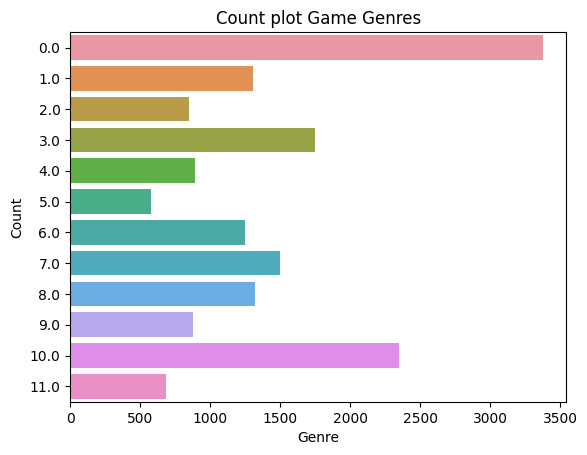

In [106]:
#Plotting of the target(Genre) variable.
sns.countplot(y='Genre', data=encoded_data_class)

plt.title('Count plot Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')

#Show the plot
plt.show()

The plot above shows that there is an uneven distribution of genres due to oversampling

Applying SMOTE since our target 'Rating' data is not equally distributed, Synthetic Minority Oversampling Technique
(SMOTE) will assist us to balance it.

In [107]:
# import SMOTE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors = 3) # The initialising the SMOTE object

# Re-sampling the input and output variables using SMOTE
X_sm, y_sm = sm.fit_resample(X, y) # The object is applied

# reassigning the balanced dataset to X,y
X, y = X_sm, y_sm 


Text(0.5, 1.0, 'Countplot of Genre')

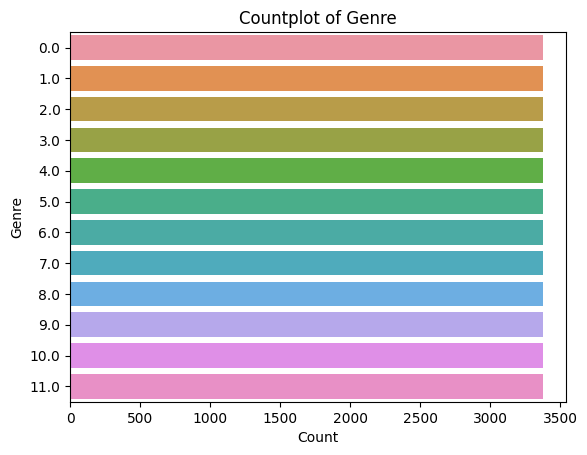

In [108]:
# create the countplot
ax = sns. countplot(y=y, data =encoded_data_class )
# set the labels for the axes and the title
ax.set_xlabel('Count')
ax.set_ylabel('Genre')
ax.set_title('Countplot of Genre')

In [109]:
clf = DecisionTreeClassifier() #Initializing the classifier

cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Perform cross_validation

scores = cross_val_score(clf,X,y,cv=cv)

#Fit classifier on the dataset.

clf.fit(X, y)

#Making predictions on the test data.

y_pred2 = clf.predict(X)

In [110]:
y_pred2

array([10.,  4.,  6., ..., 11., 11., 11.])

In [111]:
# Printing the mean and standard deviation of scores.

print('Cross-validation scores: ', scores)
print('Mean score: ', scores.mean())
print('Standard deviation: ', scores.std())
print('Train score: ', scores.mean() + 2*scores.std())

Cross-validation scores:  [0.41406153 0.41517361 0.42271098 0.40924256 0.41015818]
Mean score:  0.4142693724992196
Standard deviation:  0.004781055154549626
Train score:  0.42383148280831884


In [112]:
#Printing the Classification report
print('Classification Report: ')
print(classification_report(y, y_pred2))

Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3372
         1.0       1.00      1.00      1.00      3372
         2.0       1.00      1.00      1.00      3372
         3.0       1.00      1.00      1.00      3372
         4.0       1.00      1.00      1.00      3372
         5.0       1.00      1.00      1.00      3372
         6.0       1.00      1.00      1.00      3372
         7.0       1.00      1.00      1.00      3372
         8.0       1.00      1.00      1.00      3372
         9.0       1.00      1.00      1.00      3372
        10.0       1.00      1.00      1.00      3372
        11.0       1.00      1.00      1.00      3372

    accuracy                           1.00     40464
   macro avg       1.00      1.00      1.00     40464
weighted avg       1.00      1.00      1.00     40464



In [113]:
# Printing the confusion Matrix
print('Confusion Matrix: ')
print(confusion_matrix(y, y_pred2))

Confusion Matrix: 
[[3372    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3372    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3372    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3372    0    0    0    0    0    0    0    0]
 [   1    1    0    1 3369    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3372    0    0    0    0    0    0]
 [   0    1    0    0    1    0 3370    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3372    0    0    0    0]
 [   0    0    0    0    0    0    0    0 3372    0    0    0]
 [   0    1    0    1    0    0    0    0    0 3370    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3372    0]
 [   0    0    0    0    0    0    0    0    0    0    0 3372]]


**Findings:**

The confusion matrix shows the number of instances that were correctly or incorrectly classified for each class. Diagonal values were correctly classified while the in-correctly classified values are the Off-Diagonals. In this case we can see that the model has an overall accuracy of 99.79%. Hence, the Genre can be a good prediction of sales. However, comparing it overall accuracy to that of Rating which is 99.99%, it can be concluded that Rating variablr would performed best in classifying the dataset.

## Question 2E

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the training set
train_preds = model.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Evaluate the model on the testing set
test_preds = model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

# Print the training and testing accuracies
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)

Training accuracy: 0.19505112600784652
Testing accuracy: 0.19288273816878784


## Question 2F

- Can your classification models be deployed in practice based on their performances? Explain.

Yes, they can be deployed in practice has their performance was satisfactory and most especially they did not overfit.